# Introducción

A los matemáticos nos gusta jugar con diferentes estructuras algebráicas, monoides, grupoides, anillos, modulos, campos, etc. A diferencia de lo que cree la mayoría de personas, los matemáticos somos muy perezosos (realmente lo digo por mí) para hacer cuentas y más cuando son operaciones repetitivas que debemos hacer utilizando lapiz y pápel. Así que desde hace un tiempo he estado explorando como utilizar los lenguajes de programación para estudiar estas estructuras algebráicas y construir muchos ejemplos, sin perder mucho tiempo haciendo cálculos tediosos y poder centrar la atención en la compresión y utilidad de estas estructuras que es lo que finalmente importa. En mis investigaciones he encontrado que es posible construir algunas de estas estructuras empleando algunos de los métodos especiales de las clases en Python. Así, que te quiero compartir algunos de mis secretos y seguramente si eres matemático salvarte del tedio de hacer cuentas aburridas. 

Para hacer el ejercicio más interesante, en este post voy a enseñarte cómo construir el anillo de los números enteros módulo $n$. No creas que he escogido este ejemplo por que sí. Mi yo del futuro, vino hace algunos días y me dijo que él en los próximos días te va a revelar cómo algunos algoritmos criptográficos, tanto cifrados simétricos como cifrados asimétricos están basados en este conjunto. Aunque esto te suene extraño, él vino a garantizar su existencia, y yo no lo puedo defraudar.

Además construir este conjunto de números enteros módulo $n$ también es una buena excusa para aprender a utilizar los métodos especiales  `__call__`, `__repr__`, `__add__`, `__sub__` , `__neg__`, `__truediv__`, `__mul__` y `__eq__` de las clases en Python. Así que empecemos a hilar el destino del mi yo del futuro.

# Los números enteros módulo $n$

Hace mucho tiempo, mi yo del pasado aprendió que el conjunto de los números enteros módulo $n$, es el conjunto $\mathbb{Z}_{n}$. ¿Pero qué es exactamente $\mathbb{Z}_{n}$? Bueno, no es sencillo de explicar, así que dejaré que mi yo del pasado haga su mejor esfuerzo sin aburrirte con definiciones demasiado abstractas que solo le gustan a los matemáticos.  

¡Oye yo del futuro! ¿Por qué me dejas encartado con este lio? Yo no elegí escribir este post. Esto es tu responsabilidad. Yo no debería ayudarte con esto y hacer que desaparezcas. Pero ni modo, tu amigo parece ser simpático así que le voy a ayudar a entender un poco que son los números enteros módulo $n$.  

Amigo de mi yo del futuro, para entender que es $\mathbb{Z}_{n}$, primero hay que saber que dos números enteros $a$ y $b$ son congruentes módulo $n$  si y solo si $a$ y $b$ tienen el mismo residuo cuando se dividen entre $n$ ($n$ un número natural mayor que uno). Esta relación usualmente se denota como $a\equiv b \operatorname*{mod\,}n$  y es una relación de equivalencia, es decir, es reflexiva, simétrica y transitiva. Si estos conceptos te suenan muy extraños aún, puedo invitar a mi yo del pasado, pero creo que se encuentra muy acupado por ahora, asi que te sugiero que pases rápidamente por wikipedia: [relación de equivalencia](https://en.wikipedia.org/wiki/Equivalence_relation). Allí te explican rapidamende cada uno de estos conceptos, aunque sino quieres hacerlo está bien, tampoco va a ser necesario que lo comprendas por ahora. 

Es importante que sepas que todas las relaciones de equivalencia en un conjunto lo particionan en subconjuntos disjuntos o clases disjuntas. En nuestro caso, la relación de congruencia módulo $n$ determina una partición del conjunto de números enteros por clases disjuntas, que están formadas por números congruentes módulo $n$. Por ejemplo, todas las clases de equivalencia para la relación de congruencia módulo $5$, se pueden visualizar como cada una de las columnas del siguiente arreglo:

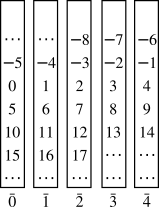

Como podrás comprobar, si tomas por ejemplo, $2$ y $12$ de la columna identificada por $\bar{2}$, encontrarás que tienen el mismo residuo cuando se dividen entre $5$, es por esta razón que se encuentran en la misma clase. Te invito a comprobar que cada que seleccionás dos números que se encuentran en una misma columna van a tener el mismo residuo cuando se dividen por $5$.

La notación de $\bar{0}, \bar{1}, \bar{2}, \bar{3}, \bar{4}$ además de identificar las columnas de nuestro arreglo, también identifica las particiones de nuestra clase de equivalencia.  

Ahora que ya tienes estas ideas básicas, ya estás preparado para entener que es es el conjunto de enteros módulo $n$ o simplemente $\mathbb{Z}_{n}$, este conjunto, como prodas intuir es el conjunto formado por las clases residuales módulo $n$, es decir, $\mathbb{Z}_{n}=\{\bar{0}, \bar{1}, \dots, \overline{n-1}\}$.

Por otro lado, si en $\mathbb{Z}_{n}$ se definen las operaciones de suma de clases residuales como $\bar{r}+\bar{s}=\overline{r+s}$ y la multiplicación de clases residuales como $\bar{r}\cdot\bar{s} = \overline{r\cdot s}$, en donde las clases residuales $\overline{r+s}$ y $\overline{rs}$ son el residuo, respectivamente, de dividir a $r+s$ y $rs$ por $n$, este se convierte en un anillo. Si en un anillo, pero esto es tema para otro momento. Para que entiendas cómo funcionan estas operaciones, considera $\mathbb{Z}_{5}$, y toma $\bar{3}$ y $\bar{5}$ y sumalos, deberías encontrar que $\bar{3} + \bar{5} = \overline{3 + 5} = \bar{8}$, y como $8$ dividido $5$ deja residuo $3$ entonces, $\bar{3} +\bar{5} = \bar{3}$. En cuanto al producto $\bar{3}\cdot \bar{5} =\overline{3\cdot 5} = \overline{15}$ y $15$ dividido $5$ deja residuo $0$, asi que $\bar{3}\cdot \bar{5}=\bar{0}$.

Es importante que tengas presente que si dos números enteros $a$ y $b$, tienen el mismo residuo cuando son dividos por $n$, entonces van a representar la misma clase, es decir, $\bar{a}=\bar{b}$.

Bueno amigo, es hora de regresar a mi trabajo. Espero que mi yo del futuro te explique muy bien como implementar $\mathbb{Z}_{n}$ empleando algunos métodos especiales de las clases en Python.

# $\mathbb{Z}_n$ como una clase de Python

Ahora que ya tienes una idea de qué es $\mathbb{Z}_{n}$, vamos a construir una clase de python que nos permita utilizar este conjunto de números como si fueran los números enteros o los números reales. 

La clases en Python tienen una serie de métodos especiales que permite definir la representación, el comportamiento y las relaciones entre diferentes instancias de una misma clase. Por ejemplo, ya conoces el significado del método `__init__` que se utiliza como constructor, pero hay otros métodos  bastante interesantes que podrás encontrar en la documentación de Python: [DataModel](https://docs.python.org/3/reference/datamodel.html). Veamos cómo utilizar algunos de estos métodos para construir los números enteros módulo $n$.

## \_\_init\_\_(self, «parameters»)

El método `__init__` es el primer método que se ejecuta cuando se crea un objeto. Este se llama automáticamente. Es decir es imposible de olvidarse de llamarlo ya que se llamará automaticamente cuando se instancia una clase. 

Nuestro conjunto de números enteros módulo `n` va ser una clase de nombre `IntegerModn`, que tendrá dos atributos, `n` e `integer`, donde $n$ representará el módulo $n$  e `integer` será cualquier entero $x\in\mathbb{Z}_{n}$, así que una base para `IntegerModn` será:

In [24]:
from __future__ import annotations

class IntegerModn:
    def __init__(self, n: int = 2):
        self.n = n
        self.integer = None

Cómo podras notar cuando se hace la instancia de la clase `IntergerModn` solo se necesita definir el módulo $n$, es decir, por ejemplo, si se quiere instanciar $\mathbb{Z}_{4}$, entonces hacemos $n=4$, veamos:

In [25]:
mod4 = IntegerModn(n=4)

Si no se define $n$ entonces el módulo será por defecto 2.

## \_\_call\_\_(self, «parameters»)

Este método permite que un objeto pueda ser llamado como una función, de modo que si se tiene una instancia `obj` de una clase que tiene definido el método `__call__` entonces podemos invocarlo como `obj(value)`, lo que en realidad es un atajo a `obj.__call__(value)`.

Ahora vamos utilizar este método para poder crear varios objetos (números enteros módulo n) haciendo simplemente `modn(value)`. Asi que `__call__` va a recibir como parámetro un número entero y va a calcular la clase residual mediante el operador `%`, veamos:

In [34]:
def __call__(self, integer: int) -> IntergerModn:
    if type(integer) is int:
        modn = self.__class__(self.n)
        modn.integer = integer % self.n
    else:
        raise AssertionError('It is not integer')
    return modn

y creemos los enteros 5 y 7 módulo 4 para la implementación:

In [39]:
a = mod4(5)
b = mod4(7)

Si tratamos de ver por consola los objetos asignados a las variables `a` y `b` respectivamente, veríamos algo así:

In [16]:
a

In [17]:
print(b)

Estas representaciones no son muy útiles, así que a continuación las vamos a cambiar empleando el método `__repr__`.

## \_\_repr\_\_(self)

Este método nos posibilita convertir un objeto en una cadena, de modo que se puede llamar a la función interna `__repr__` sobre el objeto. Normalmente esta cadena tiene el aspecto de una expresión de Python que podría utilizarse para recrear otro objeto con el mismo valor, o una cadena descriptiva en el caso de objetos complejos que podrían tener una representación muy complicada. Veamos como empleamos este método para representar a cada elemento $x$ de $\mathbb{Z}_{n}$ como `x mod n`. 

In [26]:
def __repr__(self) -> str:
    return str('{} mod {}'.format(self.integer, self.n))

Veamos nuevamente que ocurre cuando queremos ver a `a` y a `b` por consola:

In [27]:
a

3 mod 7

In [28]:
print(b)

3 mod 7


¿Y a dónde se fue el 5 y el 7? Recuerda que estamos trabajando con clases residuales, por lo tanto, 5 y 1 son las misma clase residual, pues tiene el mismo residuo cuando se dividen por cuatro. De la misma forma ocurre con 7 y 3.

Hasta el momento, nuestra clase tiene esta forma:

In [33]:
from __future__ import annotations

class IntegerModn:
    def __init__(self, n: int = 2):
        self.n = n
        self.integer = None
        
    def __call__(self, integer: int) -> IntergerModn:
        if type(integer) is int:
            modn = self.__class__(self.n)
            modn.integer = integer % self.n
        else:
            raise AssertionError('It is not integer')
        return modn
    def __repr__(self) -> str:
        return str('{} mod {}'.format(self.integer, self.n))

A continuación vamos a definir cada una de sus operaciones aritméticas, de manera que vamos a estar haciendo cosas como estas, si `a = mod4(5)` y `a = mod4(7)`, entonces `a + b == mod4(2)`.

# Sobrecarga de las operaciones aritméticas de python

Python también cuenta con métodos especiales para sobreescribir el comportamiento de las operaciones aritméticas principale. Estos permite que a los objetos se les pueda definir su propia aritmética como veremos a continuación.

Nuestra clase `IntergerModn` ya cuenta con tres métodos muy útiles para la construcción, invocación y representación. Ahora hay que incluir unos métodos adicionales que nos permita comparar, sumar, restar, multiplicar y dividir. Veamos a continuación cómo hacer esto:

## \_\_eq\_\_(self, other)

Suponga que se tienen dos objetos de la clase `IntergerModn`, `a` y `b`. `a==b` solo será `True` si son referencias al mismo objeto. Dos objetos diferentes con la misma clase residual no serían iguales en esta implementación. Esto se denomina **igualdad superficial**. Es posible crear **igualdad profunda** -igualdad por el mismo valor, no por la misma referencia- Haciendo uso del método `__eq__`. El método `__eq__` es otro método estándar disponible para cualquier clase. El método `__eq__` compara dos objetos y devuelve `True` si sus valores son iguales o `False` de lo contrario.

En la clase `IntergerModn` podemos implementar el método `__eq__` comparando la propiedad `integer` de cada objeto. Esto sería:

In [30]:
def __eq__(self, other: IntegerMod) -> bool:
    if not isinstance(IntegerMod):
        raise AssertionError('It is no integer module n')
    if self.integer == other.integer:
        return True
    else:
        return False

Así que ahora podremos identificar cuando dos elementos pertencen a una misma clase modular, por ejemplo:

In [31]:
mod7 = IntegerModn(7)
a = mod7(3)
b = mod7(10)

In [32]:
a == b

False

En efecto 3 y 10 representan la misma clase modular porque cuando se dividen por 7 se obtiene el mismo residuo.

Es importante tener en cuenta que hay dos operadores relacionales que pueden redefinirse. Por ejemplo, el método `__le__` que proporciona la funcionalidad de «menor que o igual».

Te invito a definir las operaciones $<$, $>$, $\leq$ y $\geq$ utilizando los métodos especiales que se encuentran en [DataModel](https://docs.python.org/3/reference/datamodel.html). A continuación vamos a definir las operaciones suma, resta y multiplicación.

## \_\_add\_\_(self, other)

Me imagino que ahora te debes estar preguntando ¿Y cómo sumamos los objetos de la clase `IntergerModn`? Nos gustaría poder crear objetos de `IntergerModn` y luego sumarlos usando la notación estandar `+`. En este punto, si intentamos sumar dos números enteros módulo $n$ obtendremos los siguiente:

In [34]:
mod7 = IntegerModn(7)
a = mod7(3)
b = mod7(10)

In [35]:
a + b

TypeError: unsupported operand type(s) for +: 'IntegerModn' and 'IntegerModn'

Si nos fijamos atentamente en el error, veremos que el problema es que el operador `+` no entiende los operandos para Me imagino que hora te debes estar preguntando ¿Y cómo sumamos los objetos de la clase `IntergerModn`.

Podemos corregir este error agregandole a la clase  `IntergerModn` un método asociado a la adición. En Python, este método se llama `__add__` y requiere dos parámetros, el primero, `self`, siempre es necesario, y el segundo representa el otro operando en la expresión. Por ejemplo, `a.__add__(b)`, pedirá a la objeto `IntergerModn a` que sume el objeto `IntergerModn b` a sí mismo. Esto se puede escribir en la notación estandar, `a + b`.

Dos números enteros módulo $n$, se suman mediante $\bar{r}+\bar{s}=\overline{r+s}$, es decir, se toman dos objetos de `IntergerModn` y se obtiene una nueva instancia de `IntergerModn` si modificar las instancias originales. Podemos usas el método `__add__` escribiendo una expresión aritmética estandar que involucre a los representantes de las clases residuales, y asignado el resultados de la adición a un objeto de `IntergerModn`, es decir:

In [37]:
def __add__(self, other: IntegerMod) -> IntegerMod:
    if not self.n == other.n or not isinstance(IntegerModn):
        raise AssertionError('Different fields or it is no integer module n')
    modn = self.__class__(self.n)
    return modn(self.integer + other.integer)

## \_\_sub\_\_(self, other)

De misma forma se puede definir el comportamiento del operador `-`, utilizando el método `__sub__` para sobrecargarlo:

In [95]:
def __sub__(self, other: IntegerModn) -> IntegerModn:
    if not self.n == other.n or not isinstance(IntegerModn):
        raise AssertionError('Different fields or it is no integer module n')
    modn = self.__class__(self.n)
    return modn(self.integer - other.integer)

## \_\_mul\_\_(self, other)

 y tambien para el operador `*`, utilizando el método `__mul__`:

In [9]:
def __mul__(self, other: IntegerModn) -> IntegerModn:
    if not self.n == other.n or not isinstance(IntegerModn):
        raise AssertionError('Different fields or it is no integer module n')
    modn = self.__class__(self.n)
    return modn(self.integer * other.integer)

## \_\_neg\_\_(self)

Además, para que las operaciones entre los objetos de la clase `IntergerModn` sean más naturales, podemos utilizar el método `__neg__`, para definir el inverso adictivo:

In [10]:
def __neg__(self) -> IntegerModn:
    modn = IntegerModn(self.n)
    return modn(-self.integer % self.n)

## \_\_truediv\_\_(self, other)

Y finalmente para la división, empleando el método `__truediv__`. Aunque para sobrescribir el comportamiento de la división es un poco más complicado porque para la división de dos números enteros modulo $n$ es necesario utilizar del Algoritmo de Euclides, así que te recomiendo que te pases por wikipedia para saber cómo funciona ([Algoritmo de Euclides](https://en.wikipedia.org/wiki/Euclidean_algorithm)) y acá te dejo una pequeña implementación de este algoritmo para calcular el inverso multiplicativo de cualquier entero modulo $n$, siempre que $n$ sea primo:

In [60]:
def mul_inverse(self) -> int:
    if self.integer == 0:
        raise ZeroDivisionError('The division for zero is not defined.')
    aux1 = 0
    aux2 = 1
    y = self.integer
    x = self.n
    while y != 0:
        q, r = divmod(x, y)
        x, y = y, r
        aux1, aux2 = aux2, (aux1 - q * aux2)
    if x == 1:
        return aux1 % self.n
    else:
        raise AssertionError('The number is not relative prime with the order Zn.')

Una vez que conocemos como calcular el inverso multiplicativo, sobreescribir el comportamiento de la división es bastante sencillo, y sería algo como esto:

In [61]:
def __truediv__(self, other: IntegerModn) -> IntegerModn:
    if not self.n == other.n:
        raise AssertionError('Different fields or it is no integer module n')
    modn = IntegerModn(self.n)
    return modn(self.integer * other.mul_inverse())

Ahora es posible operar con los objetos de `IntergerModn` directamente mediante los operadores `+`,  `-`, `*` y `/`, en lugar de llamar a métodos:

In [70]:
mod7 = IntegerModn(7)
a = mod7(3)
b = mod7(10)

In [78]:
a + b, a - b, a * b, a / b, -b

(6 mod 7, 0 mod 7, 2 mod 7, 1 mod 7, 4 mod 7)

A continuación te dejo la implementación completa de la clase `IntergerModn`:

In [79]:
from __future__ import annotations

class IntegerModn:
    def __init__(self, n: int = 2):
        self.n = n
        self.integer = None
        
    def __call__(self, integer: int) -> IntergerModn:
        if type(integer) is int:
            modn = self.__class__(self.n)
            modn.integer = integer % self.n
        else:
            raise AssertionError('It is not integer ...')
        return modn
    
    def __repr__(self) -> str:
        return str('{} mod {}'.format(self.integer, self.n))
    
    def __eq__(self, other: IntegerModn) -> bool:
        if not isinstance(other, IntegerModn):
            raise AssertionError('It is no integer module n ...')
        if self.integer == other.integer:
            return True
        else:
            return False
        
    def __add__(self, other: IntegerModn) -> IntegerModn:
        if not self.n == other.n or not isinstance(other, IntegerModn):
            raise AssertionError('Different fields or it is no integer module n')
        modn = self.__class__(self.n)
        return modn(self.integer + other.integer)
    
    def __sub__(self, other: IntegerModn) -> IntegerModn:
        if not self.n == other.n or not isinstance(other, IntegerModn):
            raise AssertionError('Different fields or it is no integer module n')
        modn = self.__class__(self.n)
        return modn(self.integer - other.integer)
    
    def __mul__(self, other: IntegerModn) -> IntegerModn:
        if not self.n == other.n or not isinstance(other, IntegerModn):
            raise AssertionError('Different fields or it is no integer module n')
        modn = self.__class__(self.n)
        return modn(self.integer * other.integer)
    
    def __neg__(self) -> IntegerModn:
        modn = IntegerModn(self.n)
        return modn(-self.integer % self.n)
    
    def __truediv__(self, other: IntegerModn) -> IntegerModn:
        if not self.n == other.n:
            raise AssertionError('Different fields or it is no integer module n')
        modn = IntegerModn(self.n)
        return modn(self.integer * other.mul_inverse())
    
    def mul_inverse(self) -> int:
        if self.integer == 0:
            raise ZeroDivisionError("The division for zero is not defined.")
        aux1 = 0
        aux2 = 1
        y = self.integer
        x = self.n
        while y != 0:
            q, r = divmod(x, y)
            x, y = y, r
            aux1, aux2 = aux2, (aux1 - q * aux2)
        if x == 1:
            return aux1 % self.n
        else:
            raise AssertionError("The number is not relative prime with the order Zn.")

## Conclusiones

Espero que en este pequeño viaje, hayas aprendido que es posible redefinir el comportamientode los operadores básicos de Python (como +, -, *, /), esto se conoce como **sobrecarga de operadores** y no todos los lenguajes lo permiten, y si bien es cómodo y permite que el código sea más elegante, no es algo esencial a la Programación Orientada a Objetos. En los lenguajes más conocidos que no soportan sobrecarga de operadores están C, Java y Pascal. Entre los lenguajes más conocidos que si soportan sobrecarga de operadores están Python, C++, C#, Perl y Ruby.

Nos vemos en otro momento, para ver algunas aplicaciones de los números enteros módulos $n$ en criptografía y como resolver algunos rompecabezas matemáticos con ellos. ¡Hasta pronto!

## Referencias

N. Koblitz. A Course in Number Theory and Cryptography. New York: Springer, second edition, 1994. p.83-124. ISBN 978-1-4612-6442-2. doi: 10.1007/978-1-4419-8592-7.

C. Paar And J. Pelzl. Understanding Cryptography, A Textbook for Students and Practitioners. Berlin: Springer, 2010. p.173-204. ISBN 978-3-642-04100-6.